In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches
import numpy as np

# LSTM

In [7]:
lstm = pd.read_csv(r'C:\Github\learning_blog\Data_Science\ADS\models\model\midagri_lstm_predictions.csv')

# Convert the DATE column to datetime and set it as the index
lstm['DATE'] = pd.to_datetime(lstm['DATE'])
lstm.set_index('DATE', inplace=True)

# Resample the data
lstm["SMOOTHED_DAILY"] = lstm["PREDICTED_PRICE"].ewm(span=7).mean()
weekly = lstm.resample("W").mean()
monthly = lstm.resample("M").mean()

C:\Users\Harry.Xie\AppData\Local\Temp\ipykernel_29292\3120817561.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = lstm.resample("M").mean()


C:\Users\Harry.Xie\AppData\Local\Temp\ipykernel_29292\2546450819.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = pred_df.resample("M").mean()


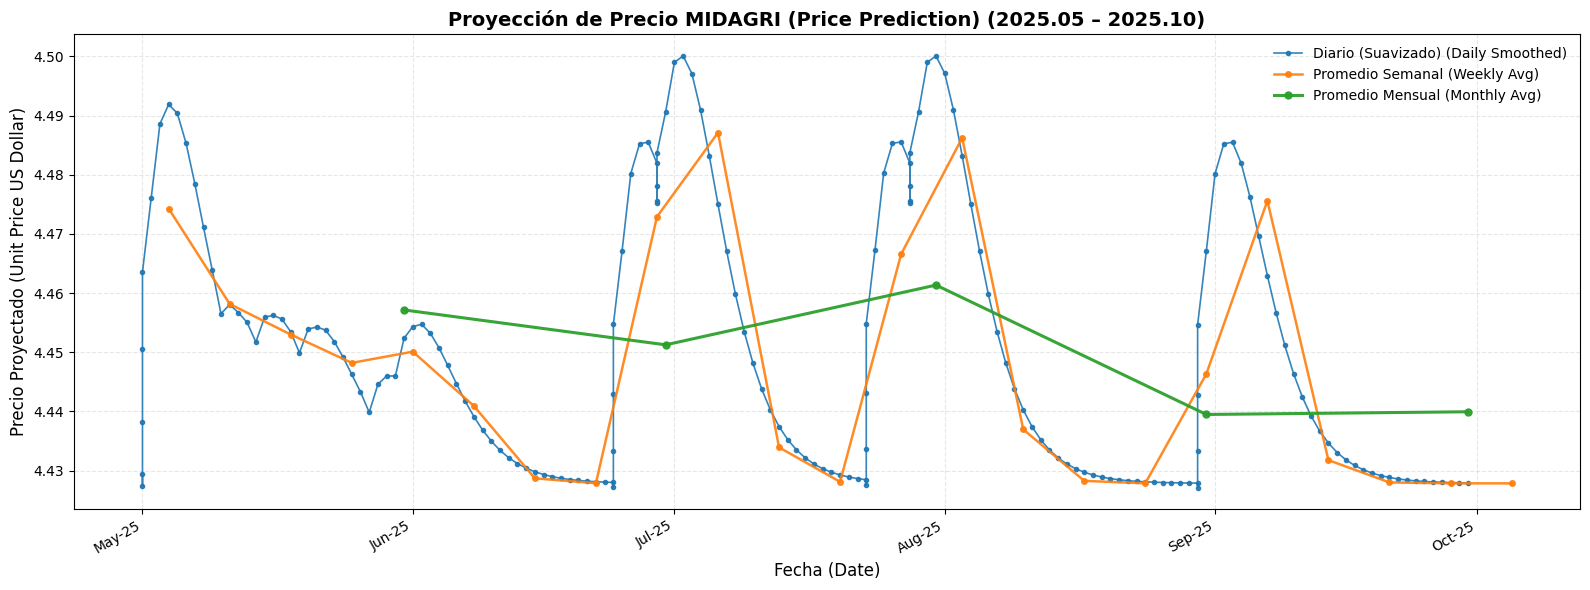

In [12]:
# --- Apply smoothing ---
lstm["SMOOTHED_DAILY"] = lstm["PREDICTED_PRICE"].ewm(span=7).mean()

# --- Drop first month for clarity ---
pred_df = lstm
weekly = pred_df.resample("W").mean()
monthly = pred_df.resample("M").mean()

# --- Plot ---
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(16, 6))

# Smoothed Daily Line with dots
ax.plot(pred_df.index, pred_df["SMOOTHED_DAILY"], label="Diario (Suavizado) (Daily Smoothed)",
        marker='o', markersize=3, linewidth=1.2, color="#1f77b4", alpha=0.9)

# Weekly Avg with dots
ax.plot(weekly.index, weekly["PREDICTED_PRICE"], label="Promedio Semanal (Weekly Avg)",
        marker='o', markersize=4, linewidth=1.8, color="#ff7f0e", alpha=0.9)

# Monthly Avg with dots
ax.plot(monthly.index, monthly["PREDICTED_PRICE"], label="Promedio Mensual (Monthly Avg)",
        marker='o', markersize=5, linewidth=2.2, color="#2ca02c", alpha=0.95)

# Styling
ax.set_title("Proyección de Precio MIDAGRI (Price Prediction) (2025.05 – 2025.10)", fontsize=14, weight='bold')
ax.set_xlabel("Fecha (Date)", fontsize=12)
ax.set_ylabel("Precio Proyectado (Unit Price US Dollar)", fontsize=12)
ax.legend(frameon=False, fontsize=10)
ax.grid(True, linestyle="--", alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()
